# Part I - (Loan Data from Prosper)
## by (Nora Al-Metrik)

## Introduction
> This data set contains more than 100K loans with 80+ variables on each loan. Additionally the data set includes loan amount, interest rate, loan status, borrower income, etc.



## A) Preliminary Wrangling

In [135]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [136]:
# loading the data
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [138]:
#since there is no expectation of exploring all of the variables in the dataset, my focus of the exploration will be on about 10 of them.
df.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
36153,55C635965834447192A2434,1095297,2013-12-18 13:18:10.070000000,NaN,60,Current,NaN,0.13227,0.1099,0.0999,...,-10.97,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
13772,9A513430062276115149693,392076,2008-09-02 22:16:11.797000000,D,36,Chargedoff,2011-11-18 00:00:00,0.28320,0.2600,0.2500,...,-17.53,-20.55,130.01,130.00,0.0,1.0,0,0,0.0,35
1200,375D3567489256081C4B4B5,700292,2013-01-16 19:23:25.150000000,NaN,36,Chargedoff,2013-12-25 00:00:00,0.27285,0.2346,0.2246,...,-23.54,0.00,4383.78,4383.78,0.0,1.0,0,0,0.0,87
42736,9F9535874212582820F0CFB,871144,2013-08-15 11:28:28.580000000,NaN,60,Current,NaN,0.26877,0.2432,0.2332,...,-49.29,0.00,0.00,0.00,0.0,1.0,0,0,0.0,11
105839,B67835175068396423D4159,511482,2011-06-15 03:59:24.843000000,NaN,60,Chargedoff,2013-03-02 00:00:00,0.32958,0.3049,0.2949,...,-166.39,0.00,13215.62,13215.62,0.0,1.0,0,0,0.0,175
74896,D713346147288839355444B,420513,2009-08-14 15:17:51.760000000,NaN,36,Completed,2009-12-28 00:00:00,0.14132,0.1200,0.1100,...,-6.48,0.00,0.00,0.00,0.0,1.0,0,0,0.0,133
41384,90B335638247828370B01E8,677777,2012-11-27 12:51:01.420000000,NaN,60,Chargedoff,2013-08-11 00:00:00,0.22262,0.1982,0.1882,...,-52.53,0.00,20838.56,20838.56,0.0,1.0,0,0,0.0,238
89766,6137359983609371672003A,1098676,2014-01-11 12:54:20.583000000,NaN,36,Current,NaN,0.27776,0.2394,0.2294,...,-3.40,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
71270,884534280646679220AEB3C,381712,2008-08-12 14:18:54.010000000,NaN,36,Completed,2012-07-17 00:00:00,0.11296,0.0920,0.0820,...,-45.01,0.00,0.00,0.00,0.0,1.0,0,0,0.0,103
38011,D26A3594497828403808955,1012501,2013-11-22 12:49:00.947000000,NaN,36,Current,NaN,0.17969,0.1435,0.1335,...,-13.43,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1


In [139]:
targeted_columns = ['Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus','DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount','LoanOriginationDate', 'Recommendations', 'Investors']

In [140]:
targeted_df = df[targeted_columns]
targeted_df.sample(10)

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations,Investors
18906,60,Current,0.2644,E,2,Employed,48.0,6500.000000,NaN,8500,2014-03-04 00:00:00,0,15
41302,36,Chargedoff,0.3500,NaN,3,Full-time,2.0,4833.333333,NaN,3000,2008-06-19 00:00:00,1,31
24651,60,Current,0.1660,C,3,Self-employed,0.0,9583.333333,2.0,7500,2013-10-17 00:00:00,0,1
61532,60,Current,0.1950,C,7,Employed,3.0,4900.000000,NaN,8000,2013-11-22 00:00:00,0,1
33684,36,Current,0.0899,A,8,Employed,0.0,17083.333333,1.0,12000,2012-02-29 00:00:00,0,95
106230,36,Defaulted,0.1900,NaN,0,Not employed,0.0,0.000000,NaN,2500,2007-07-06 00:00:00,0,23
64849,36,Completed,0.1850,NaN,0,Not available,44.0,3666.666667,NaN,5000,2006-09-08 00:00:00,0,126
47528,60,Current,0.0809,AA,1,Self-employed,0.0,6666.666667,2.0,11500,2014-01-28 00:00:00,0,173
51562,60,Current,0.2489,C,1,Employed,0.0,4616.666667,NaN,15000,2012-04-30 00:00:00,0,142
92750,36,Completed,0.3000,NaN,1,Full-time,3.0,3451.500000,NaN,7500,2008-09-12 00:00:00,0,127


In [141]:
targeted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerRate               113937 non-null  float64
 3   ProsperRating (Alpha)      84853 non-null   object 
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   EmploymentStatus           111682 non-null  object 
 6   DelinquenciesLast7Years    112947 non-null  float64
 7   StatedMonthlyIncome        113937 non-null  float64
 8   TotalProsperLoans          22085 non-null   float64
 9   LoanOriginalAmount         113937 non-null  int64  
 10  LoanOriginationDate        113937 non-null  object 
 11  Recommendations            113937 non-null  int64  
 12  Investors                  113937 non-null  int64  
dtypes: float64(4), int64(5), obje

In [142]:
#Dropping missing values
targeted_df = targeted_df.dropna(subset=['ProsperRating (Alpha)']).reset_index()

In [143]:
#Changing data type
targeted_df['LoanOriginationDate'] = pd.to_datetime(targeted_df['LoanOriginationDate'])
targeted_df['TotalProsperLoans'] = targeted_df['TotalProsperLoans'].fillna(0)

### What is the structure of your dataset?

>As mentioned in the intro, this data set contains more than 100K loans with 80+ variables on each loan. Additionally the data set includes loan amount, interest rate, loan status, borrower income, etc.


### What is/are the main feature(s) of interest in your dataset?

> Trying to determine which features may be employed to forecast default on credit.



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 1. The borrowers prosper rating: will have the most influence on the likelihood of default. 
> 2. The loan amount, as well as the credit type: will play a significant impact. 
> 3. Prosper rating: will depend on stated income & employment status.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


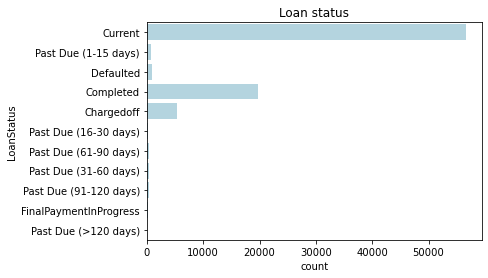

In [144]:
#Loan status:

sb.countplot(data = targeted_df, y = 'LoanStatus', color = 'lightblue').set(title ="Loan status");

The majority of the loans in the data set are current loans.
For Completed loans, defaulted loans are a minority, but charged-off loans nevertheless constitute a significant portion.
Past-due loans are classified into numerous categories based on the length of the payment delay.

In [145]:
def dynamicname (string):

    return ''.join([x if x.islower() else f" {x}" for x in string])


In [146]:
def histo(df, xVar, interval,figsize=[14,6], title= ''):
    
    bins=np.arange(df[xVar].min(),df[xVar].max()+interval, interval)
    
    df[xVar].hist(bins=bins, grid = False , fill = True, color = '#CBC3E3', figsize=figsize);
    
    xVar=dynamicname(xVar).replace("_", '')
    
    plt.title(f'distribution of {xVar}{title}'.title(), fontsize = 14, weight='bold')
    
    plt.xlabel(xVar.title(), fontsize = 10, weight='bold')
    
    plt.ylabel('Frequency'.title(), fontsize = 10, weight='bold')


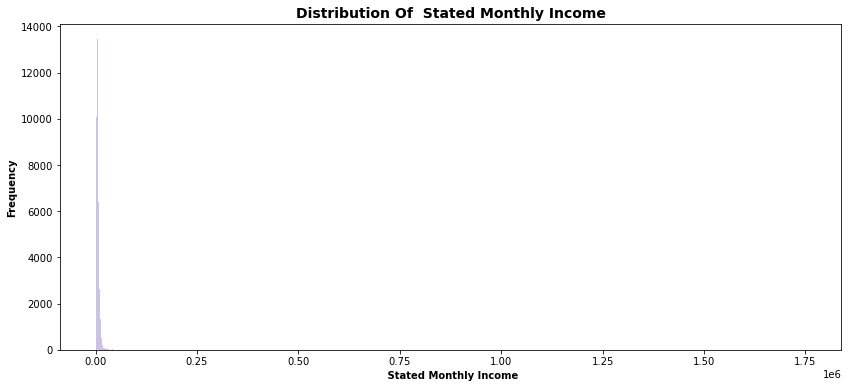

In [147]:
#Stated monthly income

histo(targeted_df,'StatedMonthlyIncome',1000);

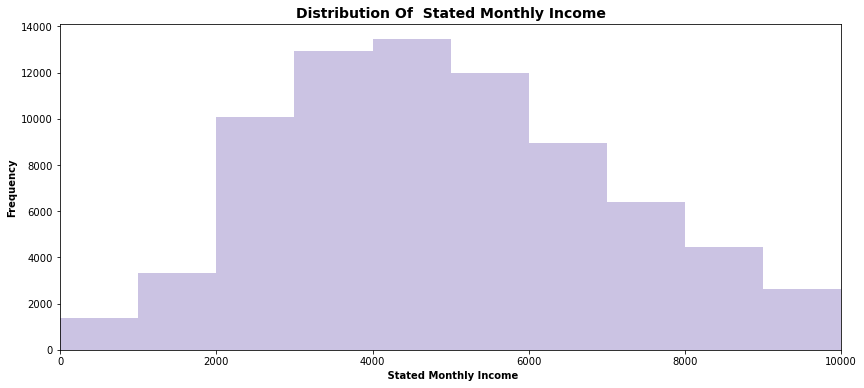

In [148]:
# Since the previous graph is not clear:
histo(targeted_df,'StatedMonthlyIncome',1000);
plt.xlim(0,10000);

The distribution of the monthly income has noticeable right skew & mode is about 5000.

[Text(0.5, 1.0, 'Employment status')]

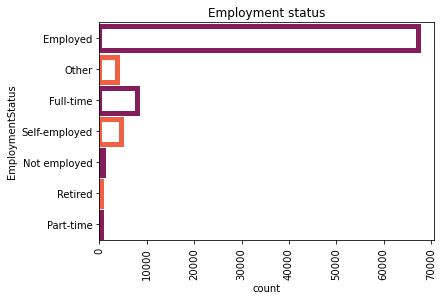

In [149]:
#Employment status:
plt.xticks(rotation = 90);
sb.countplot(y ='EmploymentStatus', data = targeted_df ,color='#A9DFBF', facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sb.color_palette('rocket', 2)).set(title = "Employment status")



Usually, borrowers are employed

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of the monthly income is noticeably skewed to the right. Additionally, the majority of borrowers are employed and most of the loans in the data set are current loans.



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Since the loans are mostly current loans while our goal is to define driving factors & the outcome of loans, I am not in any need to focus on the current loans.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [150]:
state = (targeted_df['LoanStatus'] == 'Completed') | (targeted_df['LoanStatus'] == 'Defaulted') |\
                  (targeted_df['LoanStatus'] == 'Chargedoff')
targeted_df = targeted_df[state]

def change_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
targeted_df['LoanStatus'] = targeted_df.apply(change_to_defaulted, axis=1)
targeted_df['LoanStatus'].value_counts()

Completed    19664
Defaulted     6341
Name: LoanStatus, dtype: int64

In [151]:
types = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def reduce_types(row):
    loan_types = row['ListingCategory (numeric)']
    if  loan_types in types:
        return types[loan_types]
    else:
        return types[7]
    
targeted_df['ListingCategory (numeric)'] = targeted_df.apply(reduce_types, axis=1)
targeted_df['ListingCategory (numeric)'].value_counts()

Debt Consolidation    12740
Other                  7083
Home Improvement       2612
Business               2366
Auto                   1204
Name: ListingCategory (numeric), dtype: int64

#### State & Prosper Rating:

In [152]:
creditrating = ["AA", "A", "B", "C","D","E", "HR"]

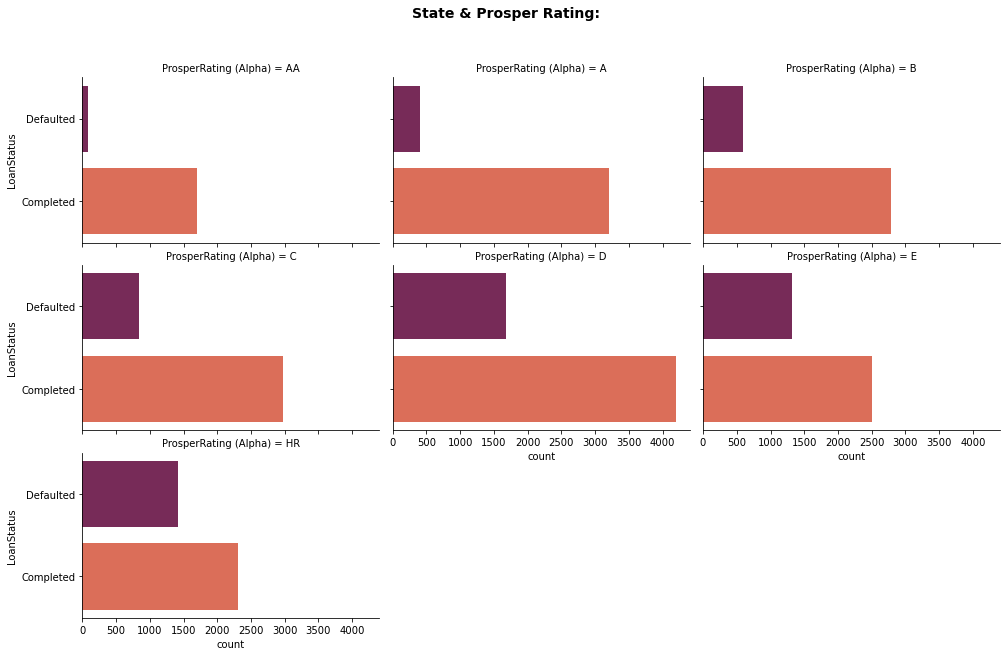

In [172]:

graphs = sb.catplot(y = 'LoanStatus', col = 'ProsperRating (Alpha)',
              data = targeted_df, kind = 'count', palette = 'rocket', col_wrap = 3 , col_order=creditrating);
plt.suptitle("State & Prosper Rating:".title(), y = 1.1, fontsize = 14, weight = "bold");

graphs.fig.set_size_inches(14, 8);

Most frequent rating(defaulted loans): D.
Most frequent rating(completed loans): D.

#### Listing types/categories

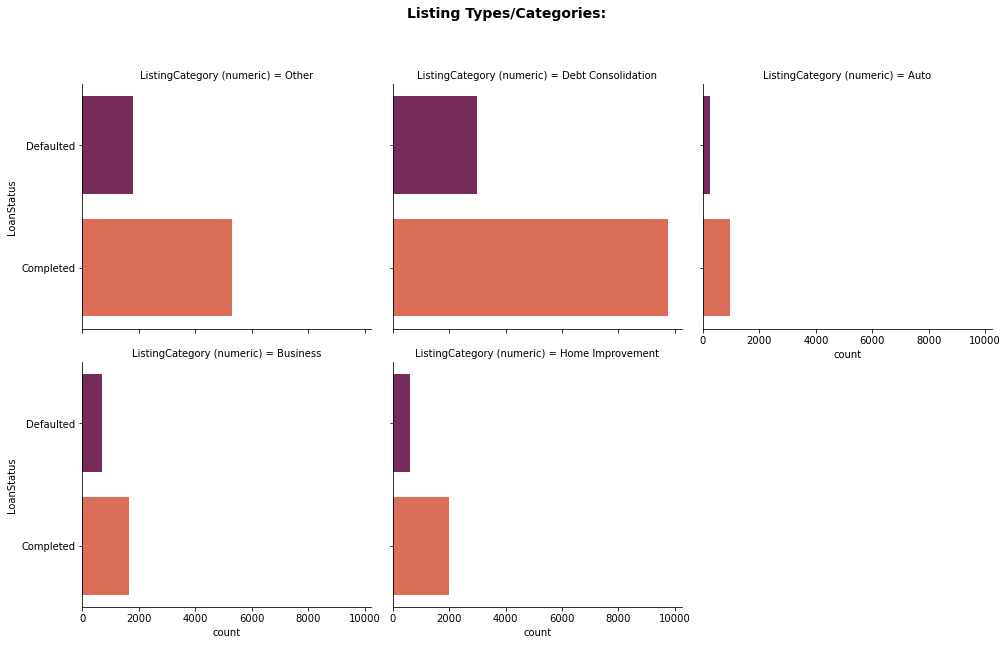

In [173]:
graph=sb.catplot(y = 'LoanStatus', col = 'ListingCategory (numeric)',
              data = targeted_df, kind = 'count', palette = 'rocket', col_wrap = 3)
plt.suptitle("Listing types/categories:".title(), y = 1.1, fontsize = 14, weight = "bold");


graph.fig.set_size_inches(14, 8);

The debt Consolidation was the most frequent.

#### Status & Amount

<AxesSubplot:xlabel='LoanOriginalAmount', ylabel='LoanStatus'>

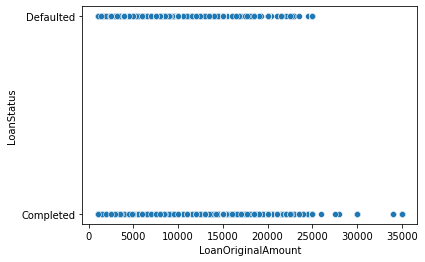

In [155]:
sb.scatterplot(data=targeted_df, y="LoanStatus", x="LoanOriginalAmount", palette = 'rocket')

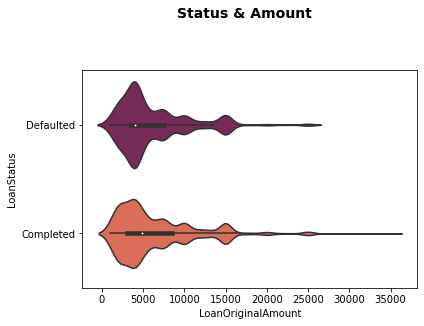

In [174]:
#A better way to look into the data
sb.violinplot(data = targeted_df, y = 'LoanStatus', x = 'LoanOriginalAmount', palette = 'rocket');
plt.suptitle("Status & Amount".title(), y = 1.1, fontsize = 14, weight = "bold");


Defaulted credits are smaller than completed credits.

#### Rating & Employment Status

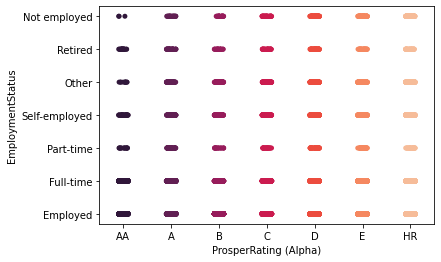

In [157]:
sb.stripplot(data=targeted_df, x="ProsperRating (Alpha)", y="EmploymentStatus", palette = 'rocket',order=creditrating);

Unfortunately, the figure above isn’t very clear so I'll be using cat plot instead

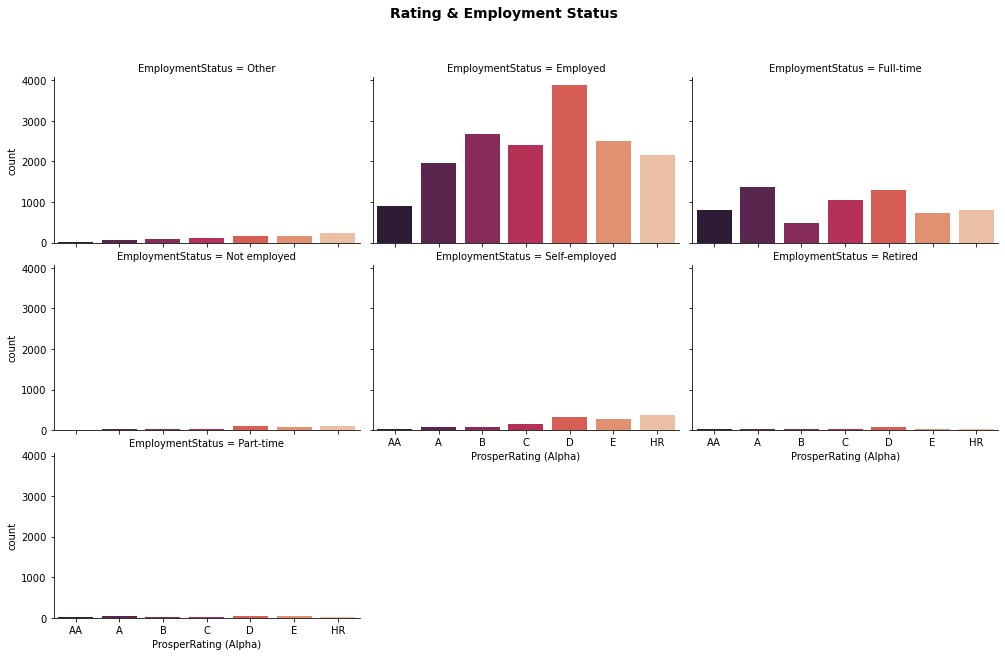

In [175]:
graphh= sb.catplot(x = 'ProsperRating (Alpha)', col = 'EmploymentStatus',
              data = targeted_df, kind = 'count', palette = 'rocket', col_wrap = 3, order=creditrating);
plt.suptitle("Rating & Employment Status".title(), y = 1.1, fontsize = 14, weight = "bold");

graphh.fig.set_size_inches(14, 8);

When the rating is lower, most people are not employed, self-employed, retired or only have a part-Time.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> A. Defaulted credits are smaller than completed credits.
> B. When the rating is lower, most people are not employed, self-employed, retired or only have a part-Time.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> In defaulted credits, rating D is the most frequent.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### Loan Rating, Amount and Status

<AxesSubplot:xlabel='LoanOriginalAmount', ylabel='ProsperRating (Alpha)'>

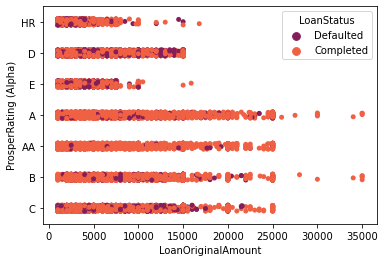

In [159]:
sb.stripplot(data=targeted_df, x="LoanOriginalAmount", y="ProsperRating (Alpha)", hue="LoanStatus", palette = 'rocket')

Unfortunately, the figure above isn’t very clear so I'll be using violin plot instead

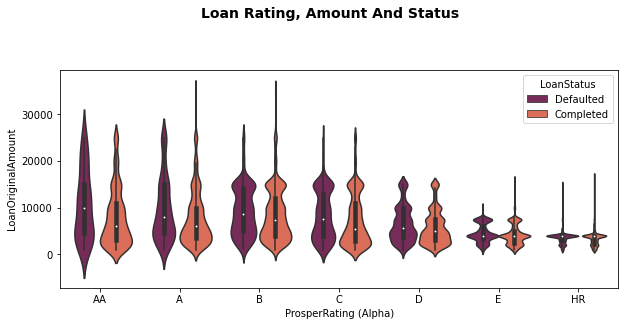

In [176]:
plt.figure(figsize = [10, 4])
sb.violinplot(data=targeted_df, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus',  palette = 'rocket', order=creditrating);
plt.suptitle("Loan Rating, Amount and Status".title(), y = 1.1, fontsize = 14, weight = "bold");


Defaulted credits > completed.
Individuals that has low Prosper rating are the source of defaulted credits.

#### Credit Category, Rating, Outcome, and Their Relationship:

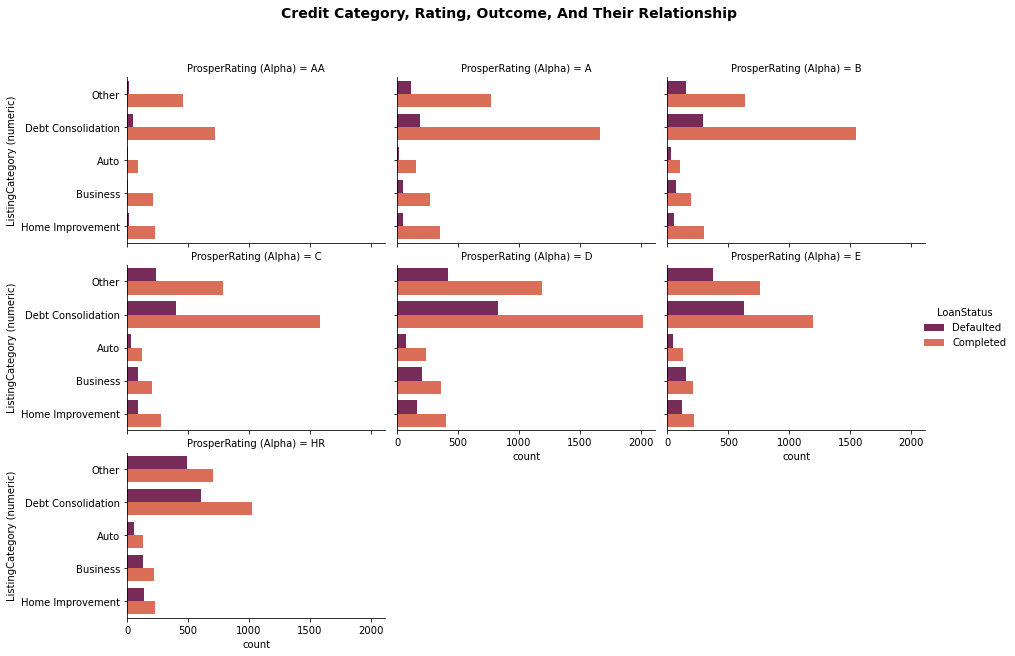

In [177]:
graphf= sb.catplot(y = 'ListingCategory (numeric)', hue = 'LoanStatus', col = 'ProsperRating (Alpha)',
              data = targeted_df, kind = 'count', palette = 'rocket',col_wrap = 3 , col_order=creditrating);
plt.suptitle("Credit Category, Rating, Outcome, and Their Relationship".title(), y = 1.1, fontsize = 14, weight = "bold");

graphf.fig.set_size_inches(14, 8);

There is more fluctuation in the second graph
Default rates in different categories are quite similar

#### Amount, Listing, Category, Status, and Their Relationship:

<AxesSubplot:xlabel='ListingCategory (numeric)', ylabel='LoanOriginalAmount'>

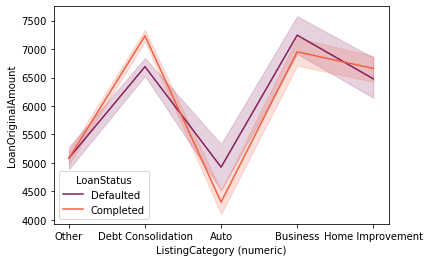

In [162]:
sb.lineplot(data=targeted_df, x="ListingCategory (numeric)", y="LoanOriginalAmount", hue="LoanStatus", palette = 'rocket')

Since the figure above isn’t very clear of the hight of Business & Debt consolidation i'll be using box plot

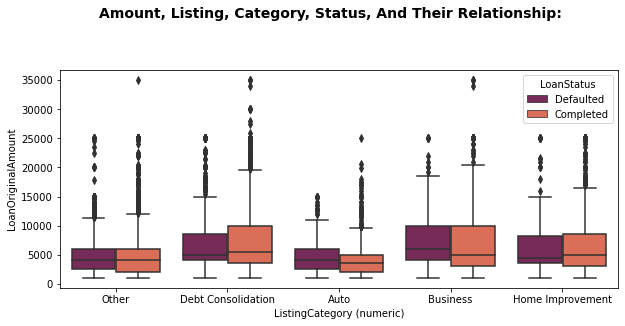

In [178]:
plt.figure(figsize = [10, 4])

sb.boxplot(data=targeted_df, x='ListingCategory (numeric)', y='LoanOriginalAmount', hue='LoanStatus', palette = 'rocket');

plt.suptitle("Amount, Listing, Category, Status, and Their Relationship:".title(), y = 1.1, fontsize = 14, weight = "bold");


The majority of business & home improvemrnt do not have equal means. While the business category has the larger amount.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The basic preconceptions were reinforced. The majority of defaulted credits come from people with poor Prosper ratings, and the Business category has a higher percentage.


### Were there any interesting or surprising interactions between features?

> It was discovered that defaulted credits for people with high Prosper ratings tend to be greater than completed credits.

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

